In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [3]:
df = pd.read_csv('./total_spkrinfo.list', delimiter=" ")

In [4]:
df.head()

,Speaker_ID,Gender,Mother_Tongue,Height,Shoulder_size,Waist_size,Weight,Age,Native_State,Native_District
0,Hin_0001,Female,Hindi,163.0,40.0,89.5,58.5,24.24,Rajasthan,Jaipur
1,Hin_0002,Female,Hindi,154.5,36.5,72,50.9,26.06,Madhya_Pradesh,Indore
2,Hin_0003,Male,Hindi,167.5,40.5,78,56.6,21.51,Haryana,Faridabad
3,Hin_0004,Male,Hindi,176.0,43.0,91.5,77.6,21.09,Chhattisgarh,Bilaspur
4,Hin_0005,Female,Hindi,153.0,40.5,96,80.2,27.39,Uttar_Pradesh,Kanpur_Nagar


Plot the scatterplot, but use different colors for different genders.

In [5]:
male_data = df[(df['Gender'] == 'Male')]
male_data.head()

,Speaker_ID,Gender,Mother_Tongue,Height,Shoulder_size,Waist_size,Weight,Age,Native_State,Native_District
2,Hin_0003,Male,Hindi,167.5,40.5,78,56.6,21.51,Haryana,Faridabad
3,Hin_0004,Male,Hindi,176.0,43.0,91.5,77.6,21.09,Chhattisgarh,Bilaspur
5,Hin_0006,Male,Hindi,166.0,43.0,86,61.6,25.98,Delhi,West
7,Hin_0008,Male,Hindi,179.0,44.0,94,81.8,29.72,West_Bengal,Haora
8,Hin_0009,Male,Hindi,165.0,43.0,89,70.2,24.08,Delhi,West


In [6]:
female_data = df[(df['Gender'] == 'Female')]
female_data.head()

,Speaker_ID,Gender,Mother_Tongue,Height,Shoulder_size,Waist_size,Weight,Age,Native_State,Native_District
0,Hin_0001,Female,Hindi,163.0,40.0,89.5,58.5,24.24,Rajasthan,Jaipur
1,Hin_0002,Female,Hindi,154.5,36.5,72,50.9,26.06,Madhya_Pradesh,Indore
4,Hin_0005,Female,Hindi,153.0,40.5,96,80.2,27.39,Uttar_Pradesh,Kanpur_Nagar
6,Hin_0007,Female,Hindi,178.0,44.0,88,67.8,25.31,Maharashtra,Gondiya
14,Hin_0015,Female,Hindi,151.0,37.0,86,63.9,26.01,Delhi,West


In [10]:
male_data = male_data[['Weight', 'Height']]
female_data = female_data[['Weight', 'Height']]

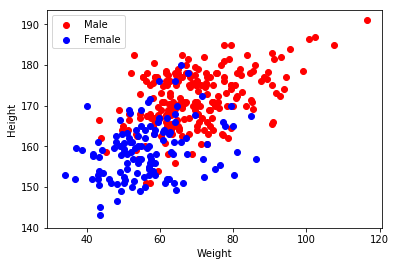

In [11]:
plt.scatter(male_data['Weight'], male_data['Height'], c='red', label="Male")
plt.scatter(female_data['Weight'], female_data['Height'], c='blue', label="Female")
plt.legend()
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [118]:
# Trying to fit the male dataset
mean_male = male_data.mean().values.reshape((2, 1))
print(mean_male)
print(mean_male.shape)

[[ 69.356621  ]
 [171.45525114]]
(2, 1)


In [119]:
cov_male = male_data.cov()
print(cov_male)
print(cov_male.shape)

            Weight     Height
Weight  142.933110  38.545022
Height   38.545022  46.737163
(2, 2)


In [120]:
N = 500
x_ = np.linspace(male_data['Weight'].min()-10, male_data['Weight'].max()+10, N)
y_ = np.linspace(male_data['Height'].min()-10, male_data['Height'].max()+10, N)

In [121]:
X, Y = np.meshgrid(x_, y_)

In [122]:
Z_male = multivariate_normal(male_data.mean(), cov_male)

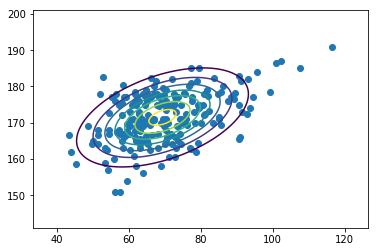

In [123]:
pos = np.dstack((X, Y))
plt.contour(X, Y, Z_male.pdf(pos))
plt.scatter(male_data['Weight'], male_data['Height'])
plt.show()

In [124]:
# Trying to fit the male dataset
mean_female = female_data.mean()
print(mean_female)
print(mean_female.shape)

Weight     56.563492
Height    159.107778
dtype: float64
(2,)


In [125]:
cov_female = female_data.cov()
print(cov_female)
print(cov_female.shape)

            Weight     Height
Weight  110.570977  22.867550
Height   22.867550  48.485741
(2, 2)


In [126]:
N = 500
x_ = np.linspace(female_data['Weight'].min()-10, female_data['Weight'].max()+10, N)
y_ = np.linspace(female_data['Height'].min()-10, female_data['Height'].max()+10, N)

In [127]:
X, Y = np.meshgrid(x_, y_)

In [128]:
Z_female = multivariate_normal(mean_female, cov_female)

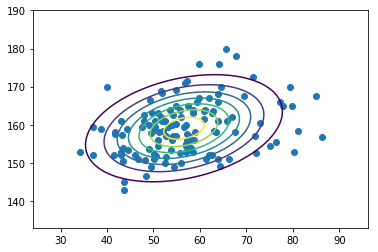

In [130]:
pos = np.dstack((X, Y))
plt.contour(X, Y, Z_female.pdf(pos))
plt.scatter(female_data['Weight'], female_data['Height'])
plt.show()

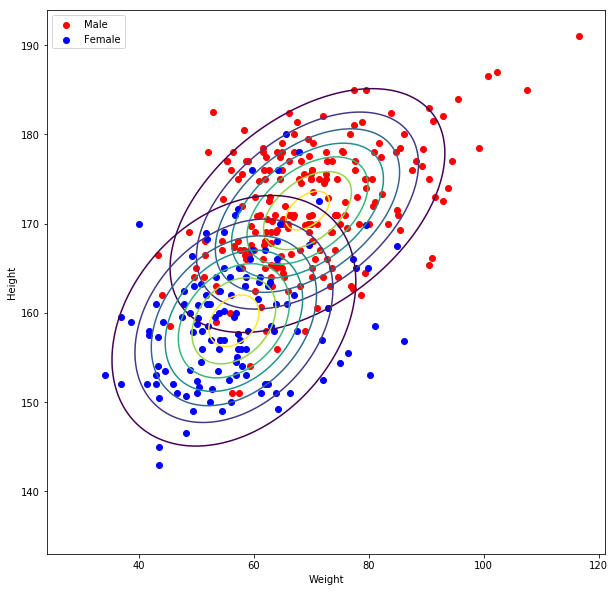

In [137]:
plt.figure(figsize=(10, 10))
plt.scatter(male_data['Weight'], male_data['Height'], c='red', label="Male")
plt.scatter(female_data['Weight'], female_data['Height'], c='blue', label="Female")
plt.contour(X, Y, Z_male.pdf(pos))
plt.contour(X, Y, Z_female.pdf(pos))
plt.legend()
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()